In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [2]:
COLOR_DARK_PETROL = '#0E7C7B'
COLOR_MEDIUM_PETROL = '#5bcfb6'
COLOR_LIGHT_PETROL = '#AFD5BF'

COLOR_DARK_VIOLET = '#63458a'
COLOR_MEDIUM_VIOLET = '#9066c4'
COLOR_LIGHT_VIOLET = '#aca2da'

COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_MEDIUM_RED = '#ff875c'
COLOR_LIGHT_RED = '#FFA359'

PALETTE_CONTRAST = [COLOR_DARK_PETROL, COLOR_MEDIUM_PETROL, COLOR_LIGHT_PETROL]
PALETTE_CONTRAST_SIMPLE = [COLOR_DARK_PETROL, COLOR_LIGHT_PETROL]

PALETTE_CONTRAST2 = [COLOR_DARK_VIOLET, COLOR_MEDIUM_VIOLET, COLOR_LIGHT_VIOLET]
PALETTE_CONTRAST2_SIMPLE = [COLOR_DARK_VIOLET, COLOR_LIGHT_VIOLET]

PALETTE_REDS = [COLOR_HEIDENELKE, COLOR_GLUTROT, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_HEIDENELKE, COLOR_GLUTROT]

PALETTE_MULTI = [COLOR_DARK_PETROL, COLOR_HEIDENELKE, COLOR_GLUTROT, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_4 = [COLOR_HEIDENELKE, COLOR_GLUTROT, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]


sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

In [3]:
PATH = "../data/0603_smalls"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [4]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

C:\Users\tina\AppData\Local\Temp\ipykernel_210808\1015052771.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_in = pd.read_csv(f"{PATH}/{file}")


Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_bitblt_small_7b09114c-6ac9-4f3a-bf32-870c9ea6fbb9.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getdbits_small_454d1363-16c4-47f4-9a8b-f5b7919aedee.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getpixel_small_a5c0ada5-5e93-4a02-a287-e88c5de7ac55.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_none_small_87d762e5-e57f-4df3-baf9-3875e2aa2ce8.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_windup_fullscreen_small_912d64aa-3a74-4059-ac55-f5e529628ce9.csv


In [5]:
data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'

In [6]:
data

,Unnamed: 0.1,Unnamed: 0,id,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete,fw,diff,threshold
0,0.0,0,0.0,DirectX11,default,DirectX11_default,False,NaN,none,4.985,-0.001,4.986,NaN
1,1.0,1,1.0,DirectX11,default,DirectX11_default,False,NaN,none,5.658,-0.001,5.659,NaN
2,2.0,2,2.0,DirectX11,default,DirectX11_default,False,NaN,none,5.742,-0.001,5.743,NaN
3,3.0,3,3.0,DirectX11,default,DirectX11_default,False,NaN,none,5.699,-0.001,5.700,NaN
4,4.0,4,4.0,DirectX11,default,DirectX11_default,False,NaN,none,6.671,-0.001,6.672,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,195,195.0,wxpython,default,wxpython_default,small,5.0,windup,7.600,4.523,3.077,520
196,NaN,196,196.0,wxpython,default,wxpython_default,small,5.0,windup,8.656,4.862,3.794,520
197,NaN,197,197.0,wxpython,default,wxpython_default,small,5.0,windup,8.613,4.565,4.048,520
198,NaN,198,198.0,wxpython,default,wxpython_default,small,5.0,windup,7.599,4.336,3.263,520


In [7]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

In [8]:
# error_dict = {}
# for framework in framework_list:
#     data_fw = data[data['framework'] != 'none']
    
#     data_fw_default = data_fw[data_fw['complexity'] == 'default']
#     num_negative_diff_default = data_fw_default[data_fw_default['diff'] < 0].count().iloc[0]
#     num_no_fw_default = data_fw_default[data_fw_default['fw'] == -1].count().iloc[0]
#     total_default = data_fw_default.count().iloc[0]

#     data_fw_rects = data_fw[data_fw['complexity'] == 'rects']
#     num_negative_diff_rects = data_fw_rects[data_fw_rects['diff'] < 0].count().iloc[0]
#     num_no_fw_rects = data_fw_rects[data_fw_rects['fw'] == -1].count().iloc[0]
#     total_rects = data_fw_rects.count().iloc[0]

#     total = data_fw.count().iloc[0]

#     error_dict[framework] = {'negative_diffs_default': num_negative_diff_default,
#                               'negative_diffs_rects': num_negative_diff_rects,
#                               'total_diffs': num_negative_diff_default + num_negative_diff_rects,
#                               'total': total,
#                               'rel_error': (num_negative_diff_default + num_negative_diff_rects) / total ,
#                               'no_fw_default': num_no_fw_default,
#                               'no_fw_rects': num_no_fw_rects,
#                               'total_fw': num_no_fw_default + num_no_fw_rects
#                             }

# error_df = pd.DataFrame(error_dict).T
# error_df = error_df.sort_values('total_diffs', ascending=False)
# error_df

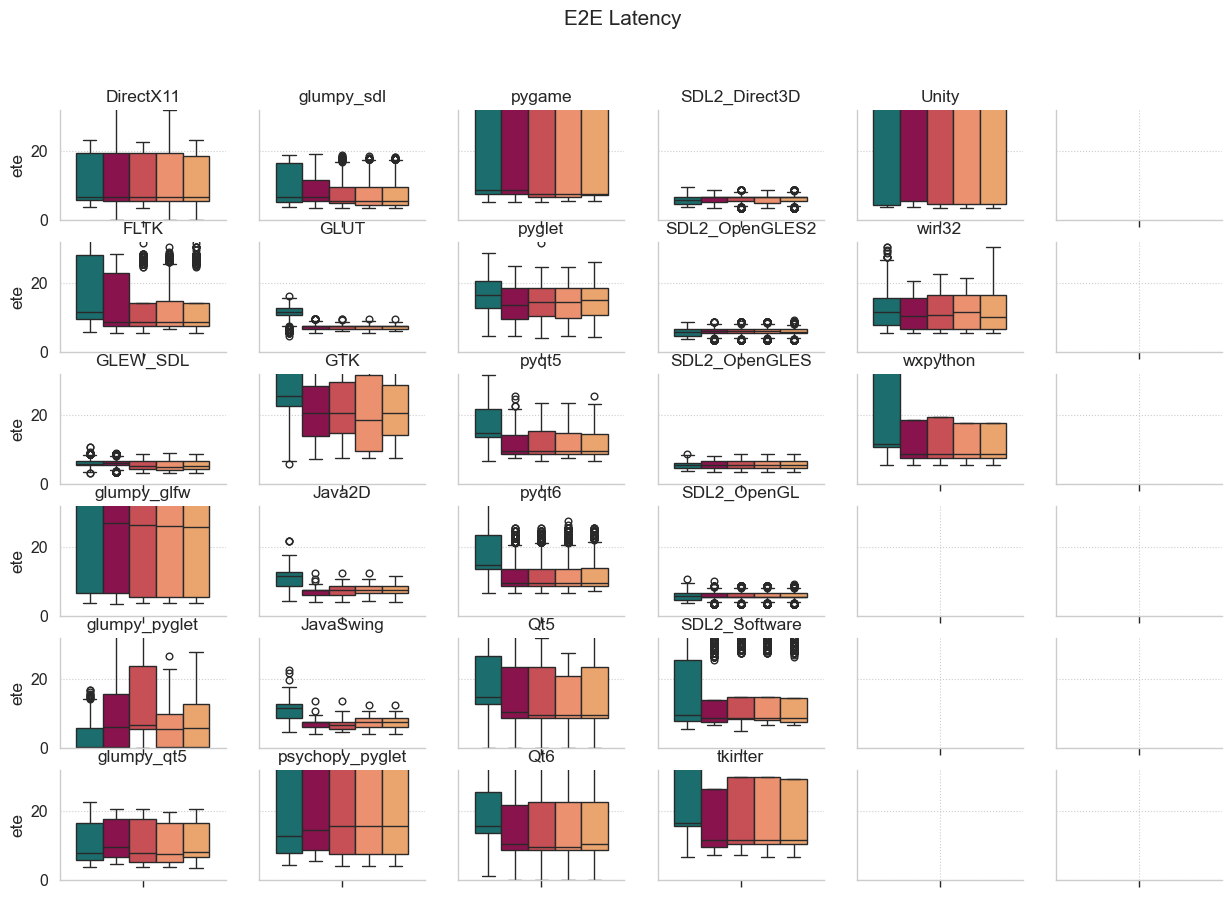

In [9]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("E2E Latency")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data[data['framework'] == framework], hue='program', y='ete', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_MULTI)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 32)
    axes[x, y].get_legend().set_visible(False)

sns.despine(bottom = False, left = False)

C:\Users\tina\AppData\Local\Temp\ipykernel_210808\3639882061.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.stripplot(ax=axes[i], data=data[data['program'] == 'bitblt'], x='framework', y='ete', hue='fullscreen', hue_order=[True, False, 'small'], dodge=True, palette=PALETTE_MULTI, size=2)
C:\Users\tina\AppData\Local\Temp\ipykernel_210808\3639882061.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.stripplot(ax=axes[i], data=data[data['program'] == 'bitblt'], x='framework', y='ete', hue='fullscreen', hue_order=[True, False, 'small'], dodge=True, palette=PALETTE_MULTI, size=2)
C:\Users\tina\AppData\Local\Temp\ipykernel_210808\3639882061.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.stripplot(ax=axes[i], data=data[data['program'] == 'bitblt'], x='framework', y='ete', hue='fullscreen', hue_order=[True, False, 'small

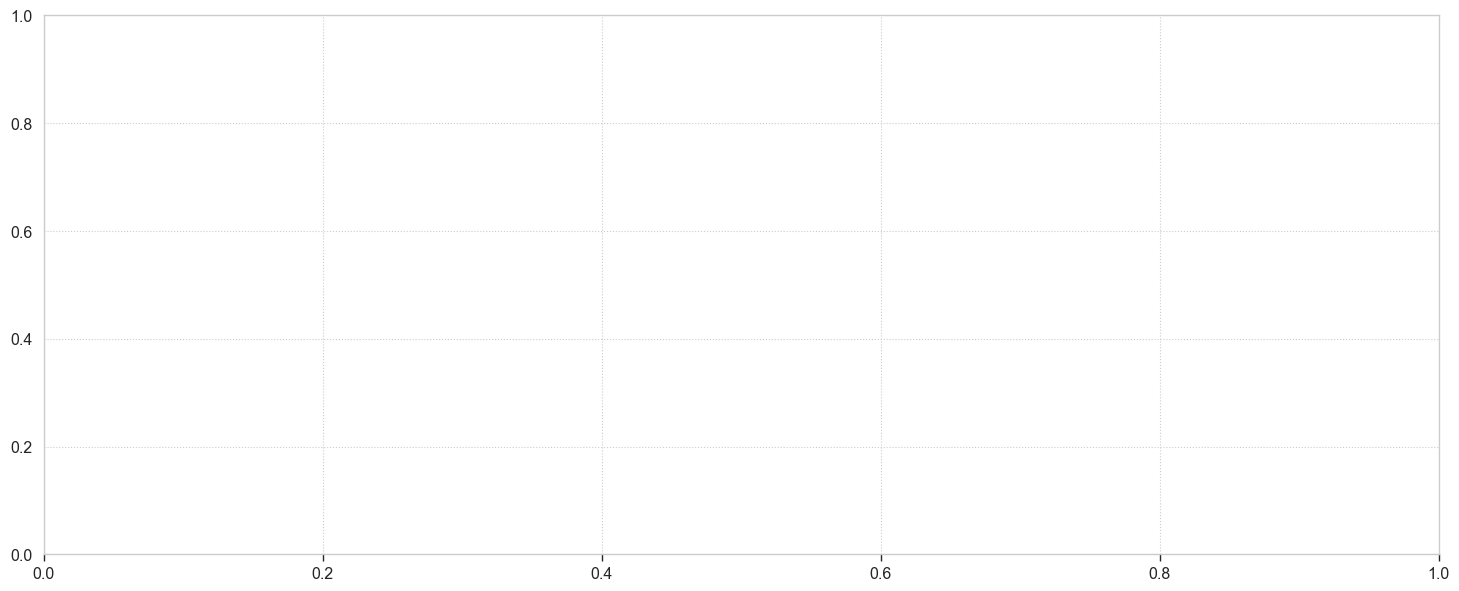

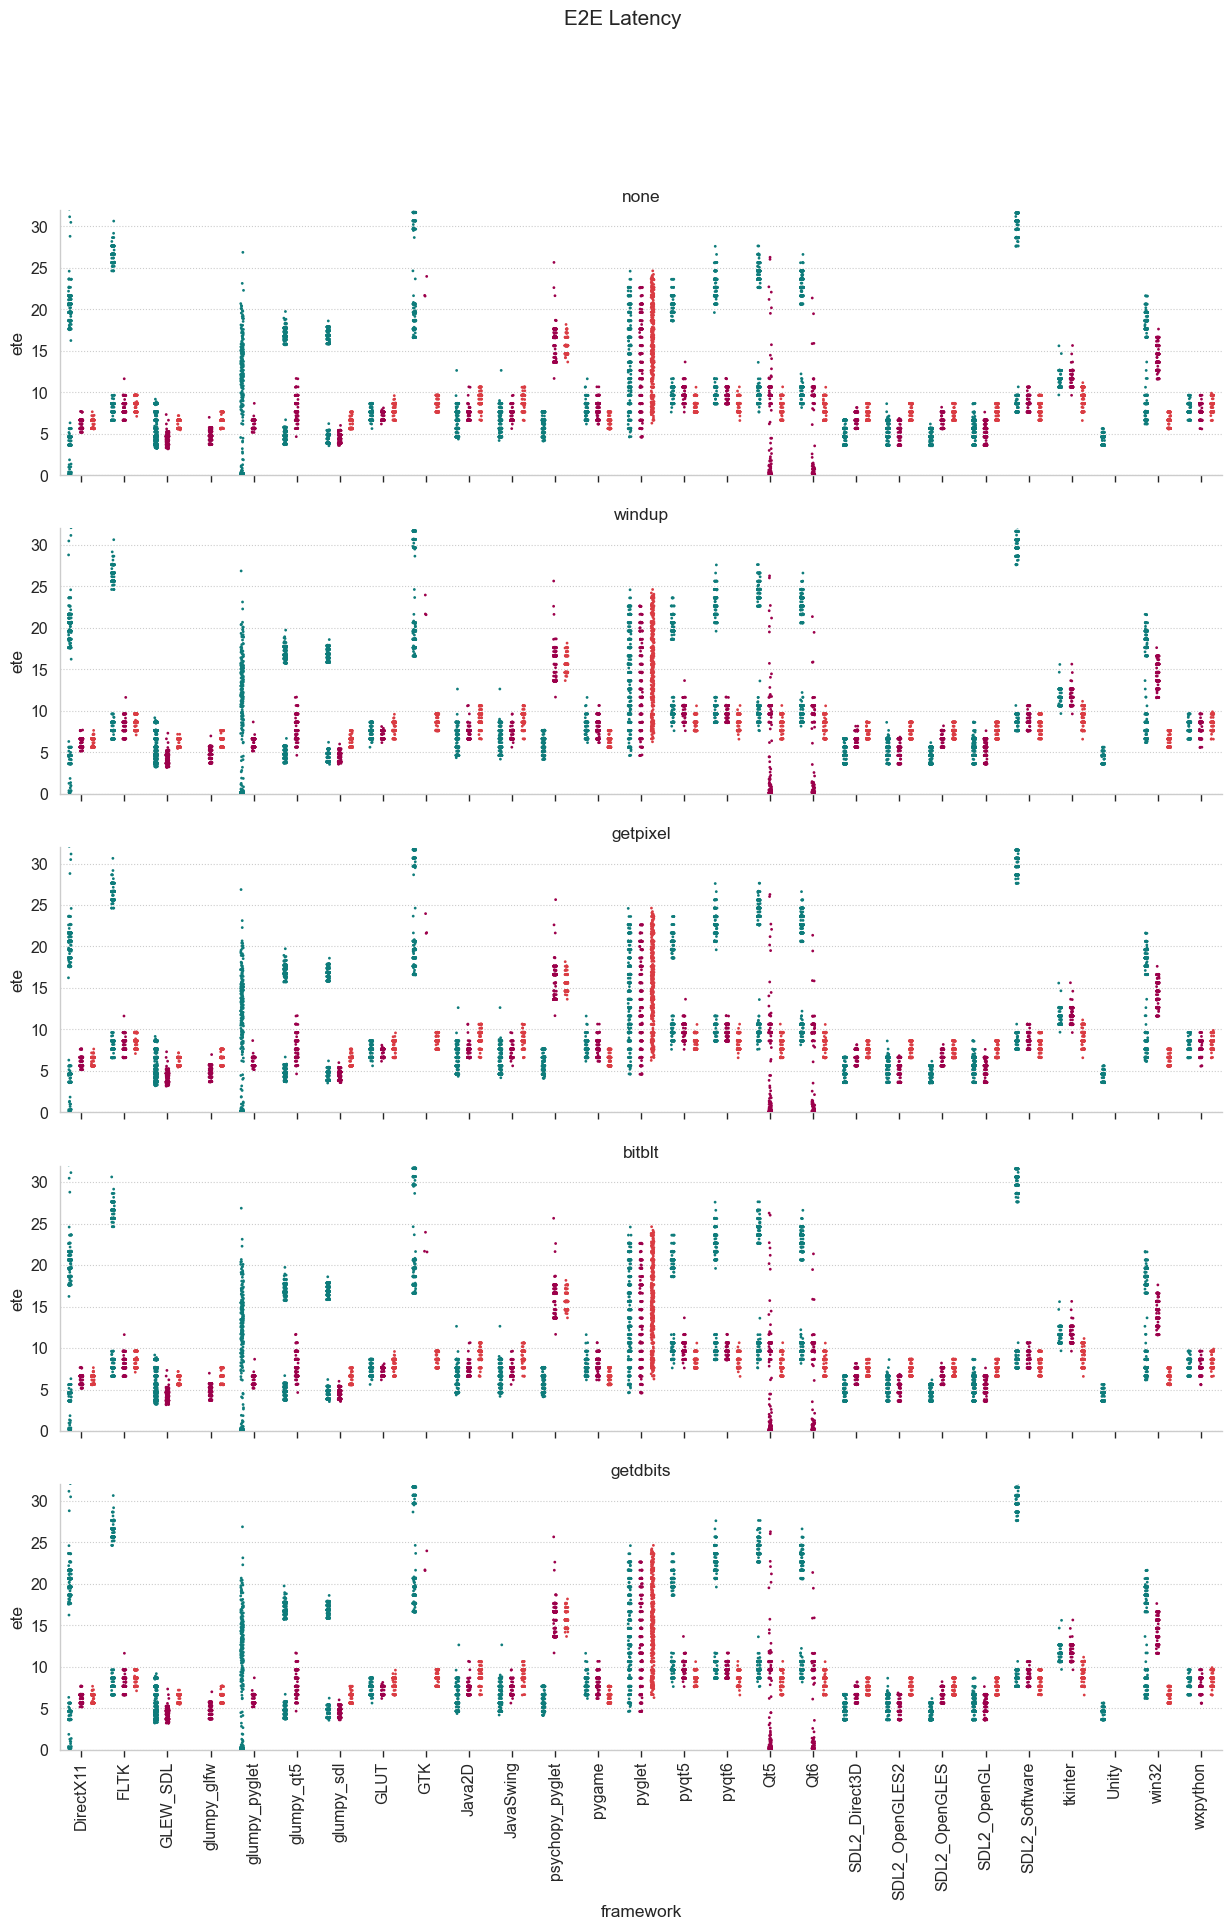

In [13]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

# plot = sns.stripplot(data=data[data['program'] == 'bitblt'], x='framework', y='ete', hue='fullscreen', hue_order=[True, False, 'small'], dodge=True, palette=PALETTE_MULTI, size=2)
# plot.set_ylim(0, 300)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('ete bitblt')
# sns.despine(bottom = False, left = False)


fig, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True, sharey=True)
fig.suptitle("E2E Latency")


for i, program in enumerate(['none', 'windup', 'getpixel', 'bitblt', 'getdbits']):
    sns.stripplot(ax=axes[i], data=data[data['program'] == 'bitblt'], x='framework', y='ete', hue='fullscreen', hue_order=[True, False, 'small'], dodge=True, palette=PALETTE_MULTI, size=2)
    axes[i].set_title(program)
    axes[i].set_ylim(0, 32)
    axes[i].get_legend().set_visible(False)

axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

C:\Users\tina\AppData\Local\Temp\ipykernel_183620\1267218966.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


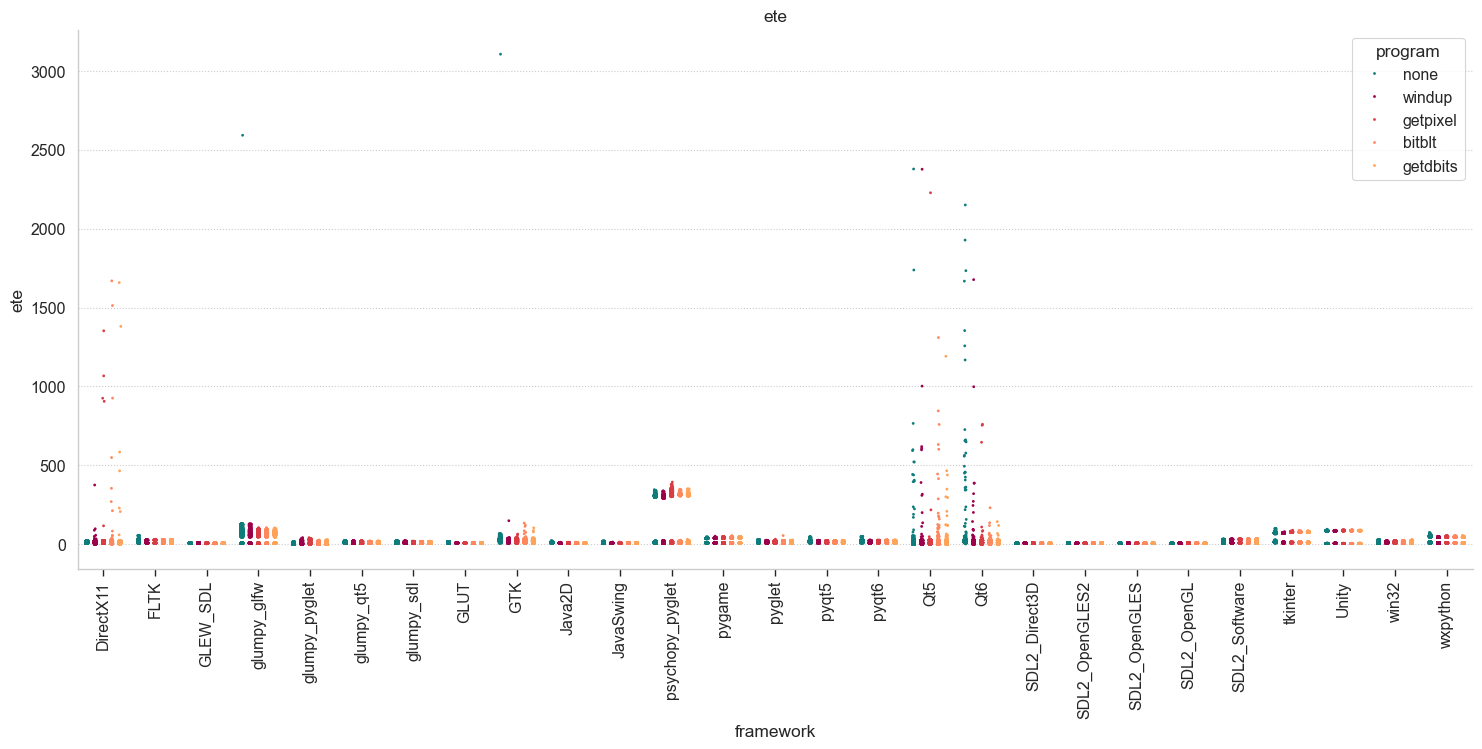

In [ ]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data, x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_MULTI, size=2)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('ete')
sns.despine(bottom = False, left = False)

C:\Users\tina\AppData\Local\Temp\ipykernel_183620\3798300023.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


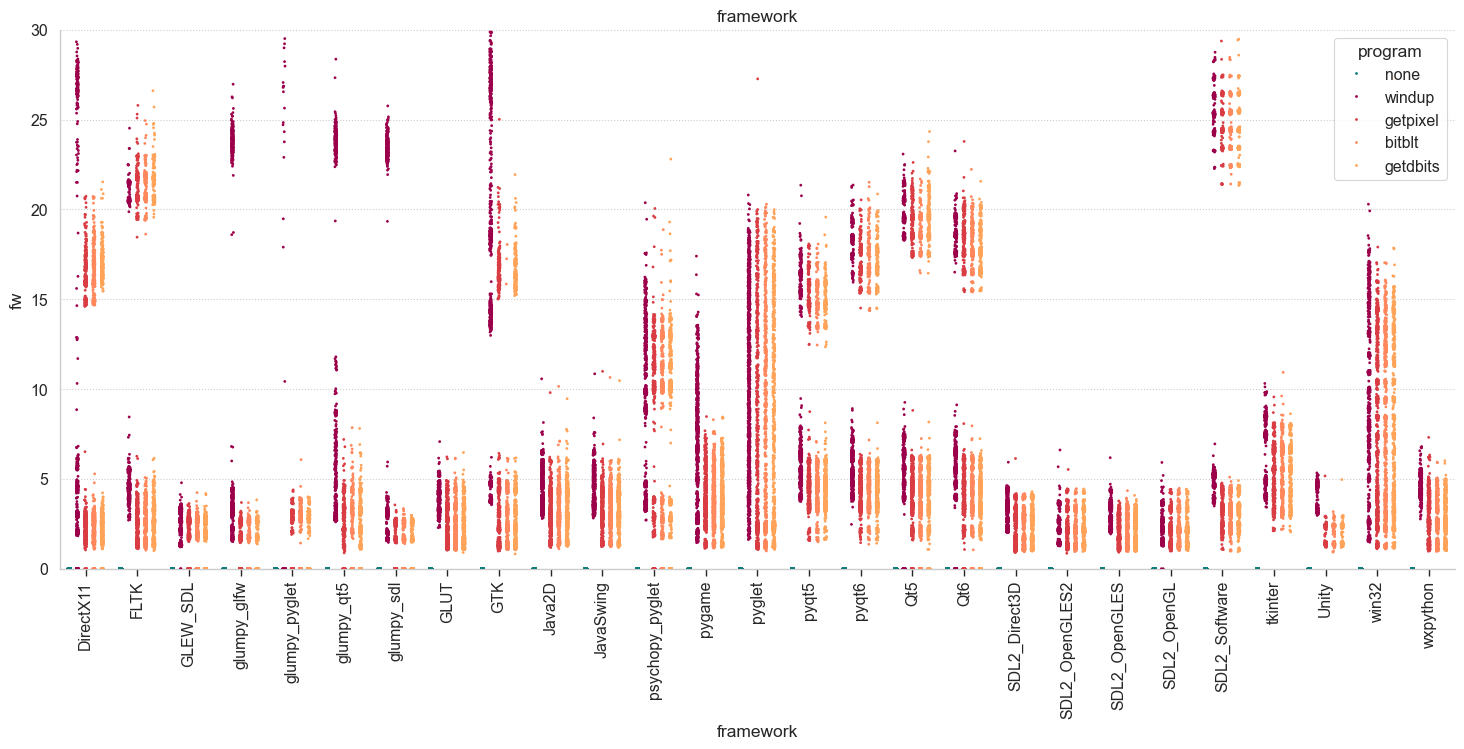

In [ ]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data, x='framework', y='fw', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_MULTI, size=2)
plot.axes.set_ylim(0, 30)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework')
sns.despine(bottom = False, left = False)

C:\Users\tina\AppData\Local\Temp\ipykernel_183620\1067425988.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


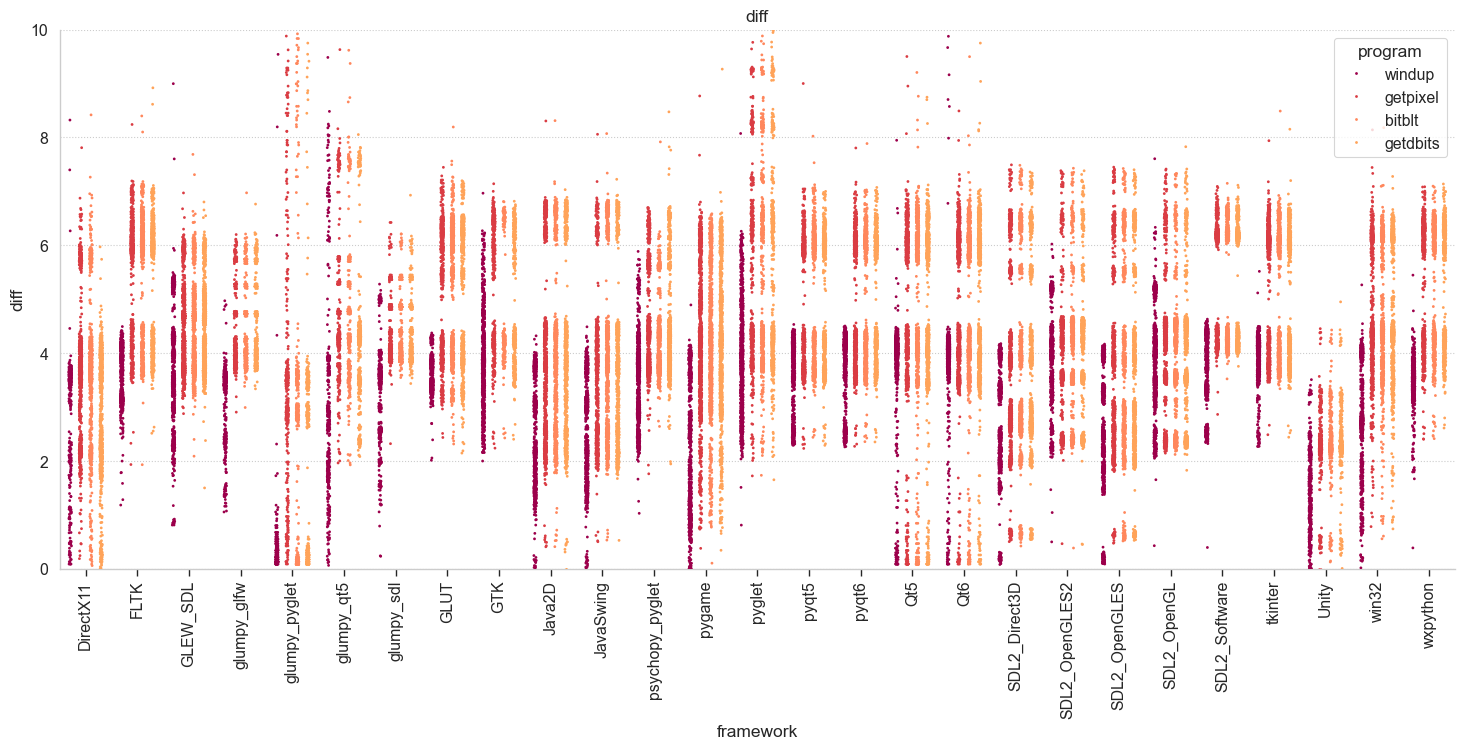

In [ ]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['program'] != 'none'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_4, size=2)

plot.axes.set_ylim(0, 10)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('diff')
sns.despine(bottom = False, left = False)